In [1]:
from sklearn.datasets import make_blobs
import numpy as np

In [8]:
# tworzymy "bloby", czyli grupy danych
X1, y1 = make_blobs(n_samples=800, centers=((2, -2), (-2, 2)), random_state=2)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=200, centers=1, random_state=42)
X2 = X2 + [6, -8]

# przydatna metoda NumPy r_ - służy do składania dwóch tablic wg wybranej osi
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [9]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [10]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# metoda zaporzyczona z przykładów sklearn oraz lekko zmodyfikowana zmodyfikowana 
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

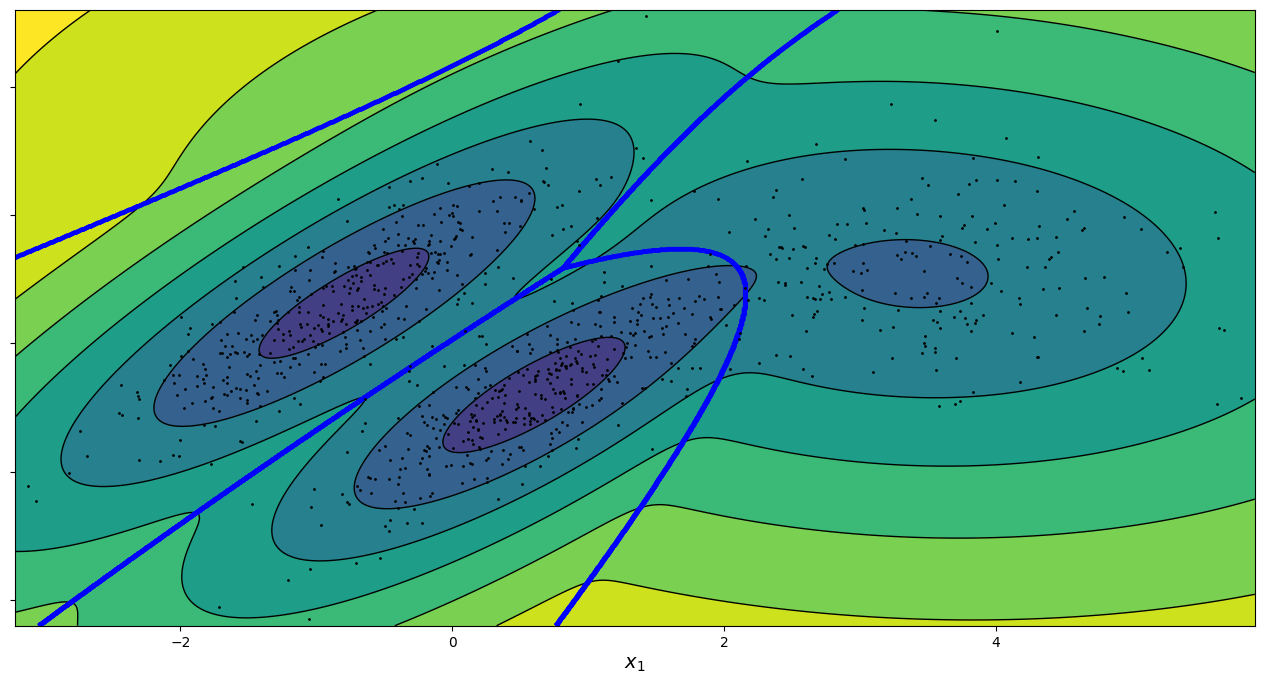

In [11]:
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

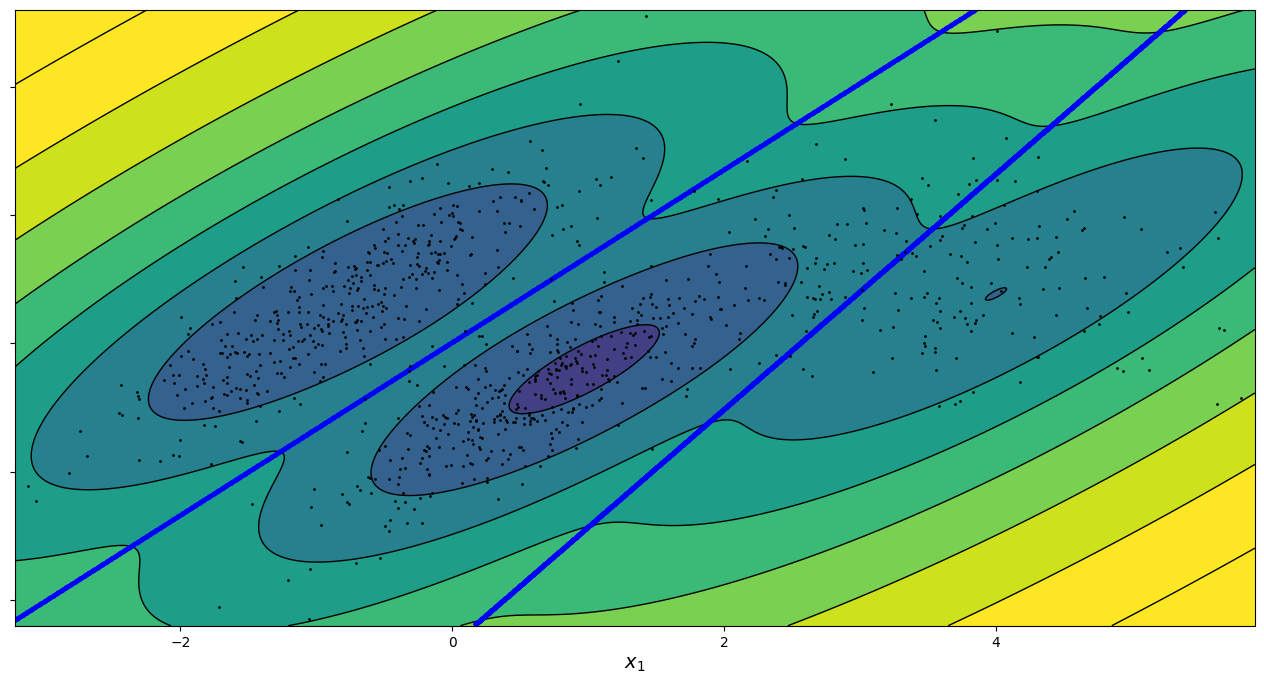

In [18]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="tied")  # taki sam kształt "bagietka"
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

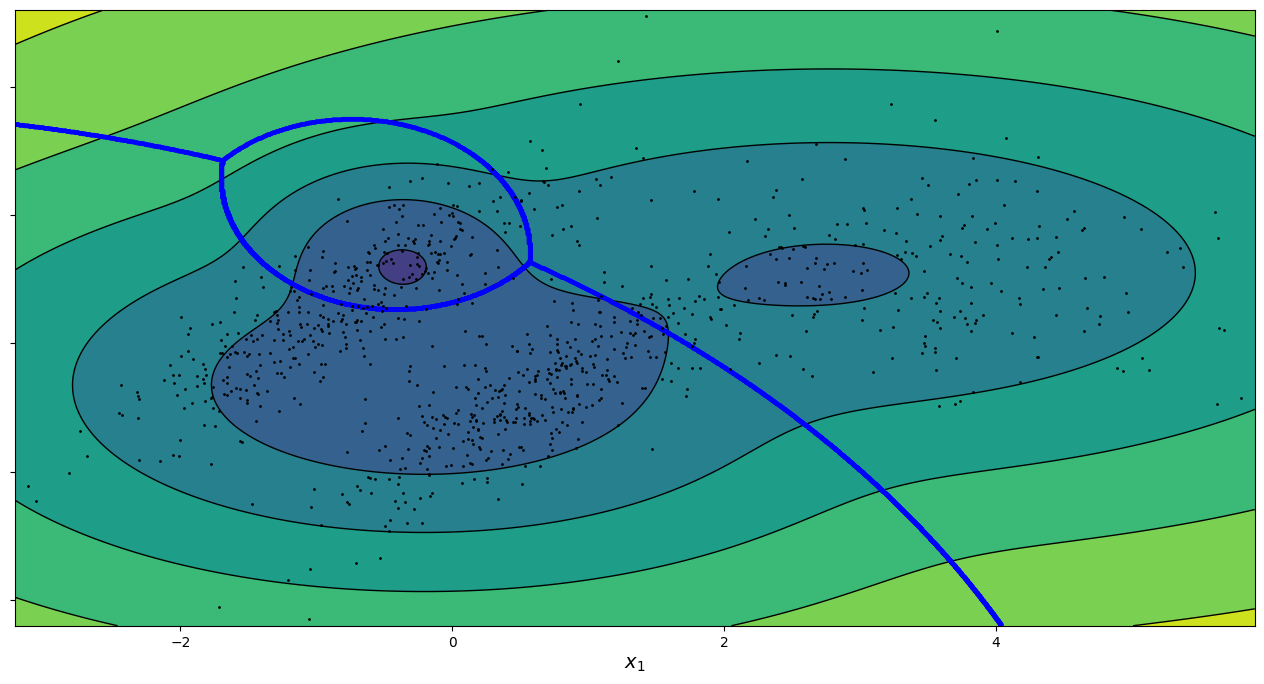

In [20]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="diag")  # kształt elipsoidalny
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

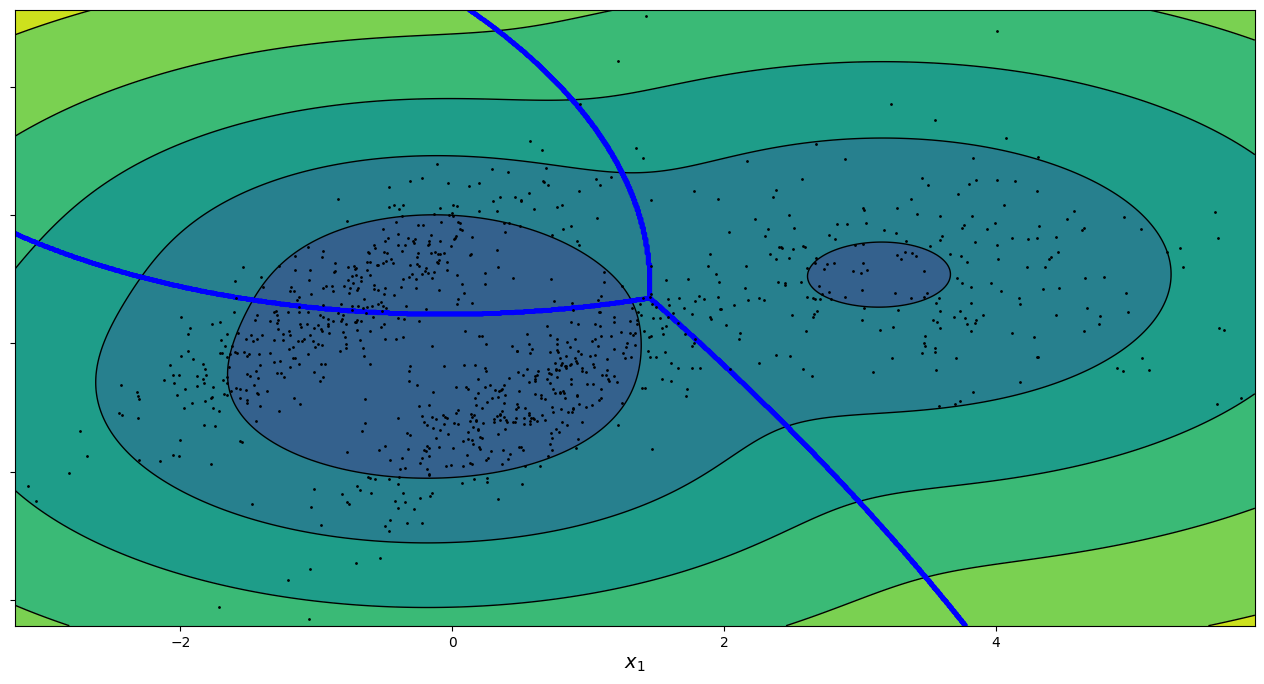

In [21]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="spherical")  # klastry to sfery
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

# GMM jako wykrywacz anomalii

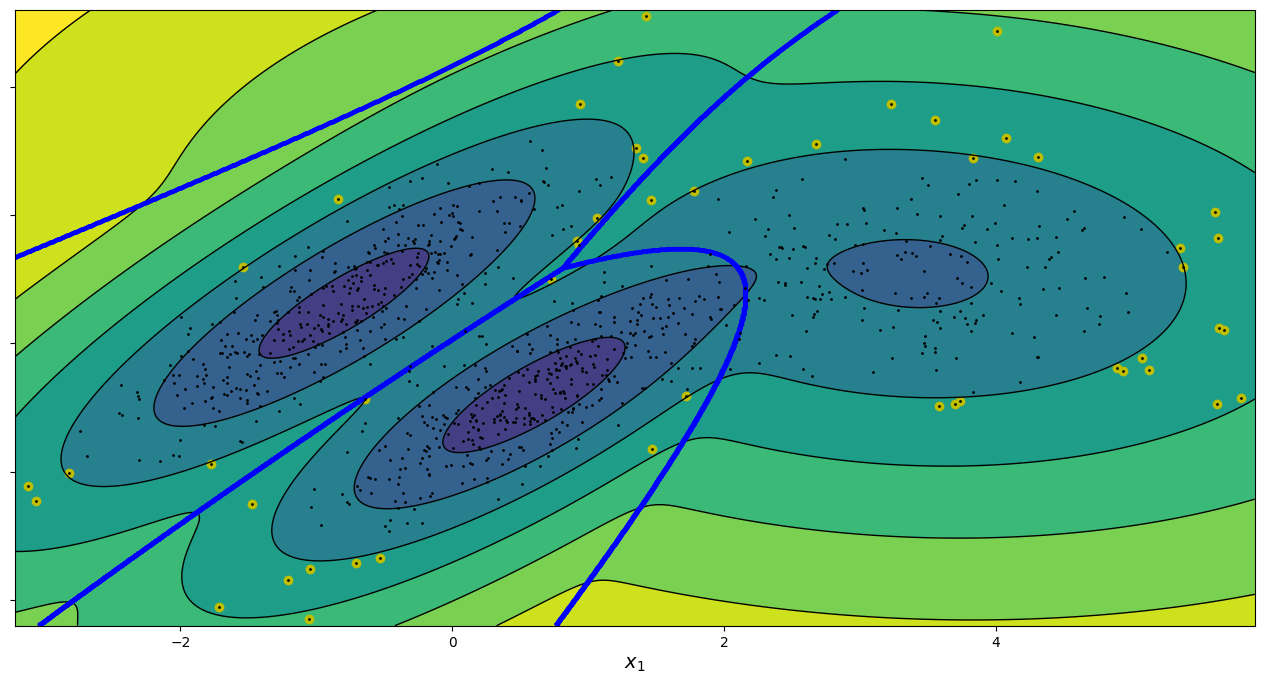

In [28]:
#odsiewanie anomalii
# rysujemy wykres jak poprzednio
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)

#dodatkowo zaznaczamy anomalie
# pobieramy wartości dla naszego zbioru, które mówią nam jak bardzo element należy do klastrów
density = gm.score_samples(X)

# tworzymy wartośc, graniczną, czyli threshold. Wartości które mają wyniki z poprzedniej linni mniejsze od naszego thresholdu, są anomaliami , więc są odsiane
# W naszym przypadku chcemy odsiać 5% najgorszych wartości wartości
threshold = np.percentile(density, 5)

# odsiewamy te wartości po przez proste porównanie
anomalie = X[density < threshold]

plt.scatter(anomalie[:, 0], anomalie[:, 1], color='y', marker='o')
plt.show()